In [1]:
%matplotlib notebook
import csv
import pandas
import matplotlib.pyplot as plt
import re

plt.style.use('ggplot')

OUTPUT_FILE_NAME = 'projects_detail_1589733144.6963723.csv'
DATE_COLUMNS = [
    'pushedAt',
    'createdAt'
]

data = pandas.read_csv(OUTPUT_FILE_NAME, parse_dates=DATE_COLUMNS)

In [6]:
len(data)

45422

In [ ]:
p = plt.hist(data['commits'].loc[data['commits']<500], 1000, histtype='step', density=True, cumulative=True)
p

In [10]:
data.dtypes

owner                            object
name                             object
isFork                             bool
isArchived                         bool
isDisabled                         bool
isLocked                           bool
isMirror                           bool
mentionableUsers                  int64
primaryLanguage                  object
pushedAt            datetime64[ns, UTC]
createdAt           datetime64[ns, UTC]
stars                             int64
commits                           int64
cmake_content                    object
dtype: object

In [41]:
FROM_TIME = pandas.Timestamp('2019-01-01 00:00:00+00:00')
filtered_df = data.query('isFork == False and \
                          isArchived == False and \
                          isDisabled == False and \
                          isLocked == False and \
                          isMirror == False and \
                          commits > 200').copy()

In [42]:
filtered_df = filtered_df[filtered_df['cmake_content'].notnull()]

In [43]:
filtered_df = filtered_df[filtered_df['pushedAt'].dt.year >= 2019]

In [44]:
len(filtered_df)

3333

In [45]:
filtered_df['cmake_version'] = filtered_df['cmake_content'].str.extract(r'cmake_minimum_required\s*?\(\s*?version\s+([\d.]*).*\s*?\)', flags = re.MULTILINE | re.IGNORECASE)

filtered_df['cmake_major_version'] = filtered_df['cmake_content'].str.extract(r'cmake_minimum_required\s*?\(\s*?version\s+(\d\.\d+).*\s*?\)', flags = re.MULTILINE | re.IGNORECASE)

In [46]:
print(filtered_df['cmake_major_version'].isna().sum(), filtered_df['cmake_version'].isna().sum())

46 31


In [47]:
filtered_df['cmake_major_version'] = filtered_df['cmake_major_version'].apply(pandas.to_numeric)

<IPython.core.display.Javascript object>


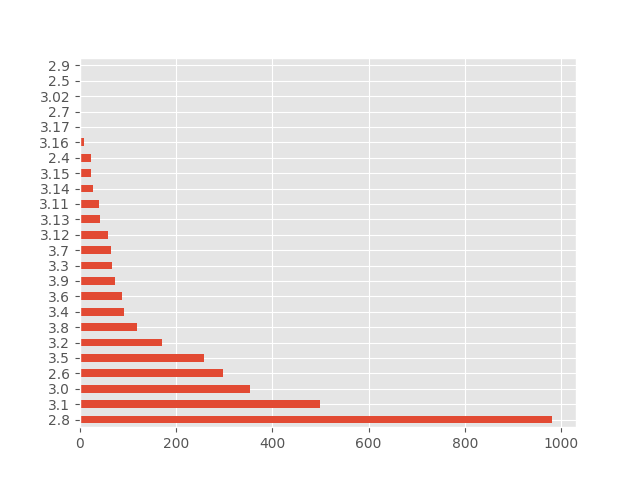

In [35]:
filtered_df['cmake_major_version'].loc[filtered_df['cmake_major_version'].isna()==False].value_counts().plot(kind='barh')

In [48]:
filtered_df = filtered_df[filtered_df['cmake_major_version'] == 3.1]

In [49]:
filtered_df.head()

,owner,name,isFork,isArchived,isDisabled,isLocked,isMirror,mentionableUsers,primaryLanguage,pushedAt,createdAt,stars,commits,cmake_content,cmake_version,cmake_major_version
41,znc,znc,False,False,False,False,False,140,C++,2020-05-17 15:15:50+00:00,2010-01-09 23:44:05+00:00,1694,5250,"#\n# Copyright (C) 2004-2020 ZNC, see the NOTI...",3.1,3.1
45,steinwurf,petro,False,False,False,False,False,9,C++,2020-02-13 23:14:46+00:00,2015-11-18 12:12:04+00:00,2,235,cmake_minimum_required(VERSION 3.10)\nproject(...,3.10,3.1
58,Colelyman,kleuren,False,False,False,False,False,4,C++,2019-03-26 15:59:39+00:00,2017-06-22 00:22:24+00:00,8,328,cmake_minimum_required(VERSION 3.1)\ninclude(E...,3.1,3.1
64,mryndzionek,esm,False,False,False,False,False,1,C,2020-05-04 17:06:41+00:00,2017-07-30 09:35:05+00:00,6,235,cmake_minimum_required(VERSION 3.10)\nproject(...,3.10,3.1
70,AeonGames,AeonEngine,False,False,False,False,False,3,C++,2020-05-06 21:47:31+00:00,2016-03-16 21:14:20+00:00,11,1021,# Copyright (C) 2016-2019 Rodrigo Jose Hernand...,3.10.0,3.1


In [50]:
filtered_df.to_csv('final_projects.csv')

In [ ]:
policy_dict = {}
for item in filtered_df.loc[filtered_df['cmake_major_version']==3.1]['cmake_content']:
    a = re.findall('cmake_policy ?\(set CMP(\d{4}) (NEW|OLD)\)', item, flags = re.MULTILINE | re.IGNORECASE)
    for policy, status in a:
        if policy in policy_dict:
            policy_dict[policy] += 1
        else:
            policy_dict[policy] = 1

In [ ]:
filtered_df.head()

In [ ]:
plt.bar(policy_dict.keys(), policy_dict.values())
plt.xticks(rotation=90)
plt.show()

In [32]:
filtered_df['cmake_content'].str.contains(r'add_compile_options', flags = re.IGNORECASE).sum()

272